**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variable**

In [2]:
vec = c(
    "fcc_astarr_macs_input_overlap",
    "fcc_astarr_macs_input_union"
)
names(vec) = vec

VEC_TXT_FOLDER = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


**View files**

In [3]:
txt_folder = VEC_TXT_FOLDER[1]
txt_fdiry  = file.path(FD_RES, "analysis_fcc_comparison", txt_folder)
txt_fname  = "region.annotation.tss_essential.coverage.crispri_growth.tsv"
txt_fglob  = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for (txt in vec) {cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/analysis_fcc_comparison/fcc_astarr_macs_input_overlap/region.annotation.tss_essential.coverage.crispri_growth.tsv 


## Import data

In [6]:
### loop to import data
lst = lapply(VEC_TXT_FOLDER, function(txt_folder){
    ### set file directory
    txt_fdiry  = file.path(FD_RES, "analysis_fcc_comparison", txt_folder)
    txt_fname = "region.annotation.tss_essential.coverage.crispri_growth.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_merge_crispri_growth_tss_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 1428   15

$fcc_astarr_macs_input_union
[1] 1455   15



Chrom,ChromStart,ChromEnd,Region,Group,Label,Score,Zcore,Score_Label,Zcore_Label,Assay_Folder,Assay_Group,Assay_Label,TSS_Proximity,TSS_Category
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
chr1,1068587,1070616,chr1:1068587-1070616,Proximal:Active,Screen:Signif,0.2520571,0.2520571,Mean(ZScore),Mean(ZScore),CRISPRi_Growth_K562_Gersbach_JinWoo,CRISPRi-Growth,CRISPRi-Growth,Proximal,Proximal:Non-Essential
chr1,1324275,1325765,chr1:1324275-1325765,Proximal:Active,Screen:Signif,0.5069515,0.5069515,Mean(ZScore),Mean(ZScore),CRISPRi_Growth_K562_Gersbach_JinWoo,CRISPRi-Growth,CRISPRi-Growth,Proximal,Proximal:Non-Essential
chr1,1573998,1575422,chr1:1573998-1575422,Proximal:Active,Screen:Signif,0.4354863,0.4354863,Mean(ZScore),Mean(ZScore),CRISPRi_Growth_K562_Gersbach_JinWoo,CRISPRi-Growth,CRISPRi-Growth,Proximal,Proximal:Essential


## Explore: Comparison CRISPRi-Growth across different TSS categories

**Set plot style**

In [7]:
### set text size
theme_text = theme(
    title        = element_text(size = 16),
    axis.title   = element_text(size = 16),
    axis.text    = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text  = element_text(size = 16)
)

### set color
dat = tribble(
    ~Group,                   ~Color,
    "Distal",                 "#ff7f00", 
    "Proximal:Non-Essential", "#fb8072",
    "Proximal:Essential",     "#e41a1c"
)
dat_annot_color = dat
vec_txt_color = setNames(dat$Color, dat$Group)
lst_txt_color = split(dat$Color, dat$Group)
theme_color   = scale_fill_manual(values=vec_txt_color)

### set legend
theme_legend = theme(legend.position = "none")

**Generate plots**

In [8]:
lst = lst_dat_region_merge_crispri_growth_tss_import
lst = lapply(lst, function(dat){
    ### set label order in plot
    vec_txt_label = c("Distal", "Proximal:Non-Essential", "Proximal:Essential")

    ### set order of labels
    dat = dat %>% 
        dplyr::mutate(
            TSS_Category = factor(TSS_Category, levels = vec_txt_label)
        )

    ### generate plot
    gpt = ggplot(dat, aes(x=Zcore, y=TSS_Category, fill=TSS_Category)) +
        geom_boxplot(coef = 2) +
        labs(x = "Z Score", y = "", title = "Active CREs screened by CRISPRi-Growth") +
        theme_cowplot() +
        background_grid() +
        theme_text +
        theme_color +
        theme_legend
    
    return(gpt)
})

### assign
lst_gpt_crispri_growth_tss_category = lst

**Show plots**

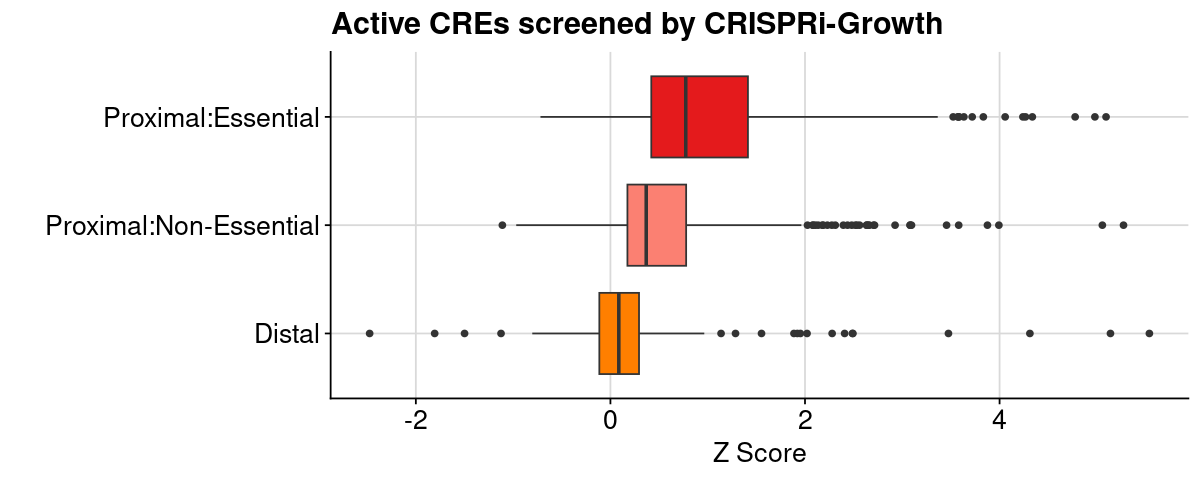

In [9]:
idx = "fcc_astarr_macs_input_overlap"
lst = lst_gpt_crispri_growth_tss_category
gpt = lst[[idx]]

options(repr.plot.height=4, repr.plot.width=10)
print(gpt)

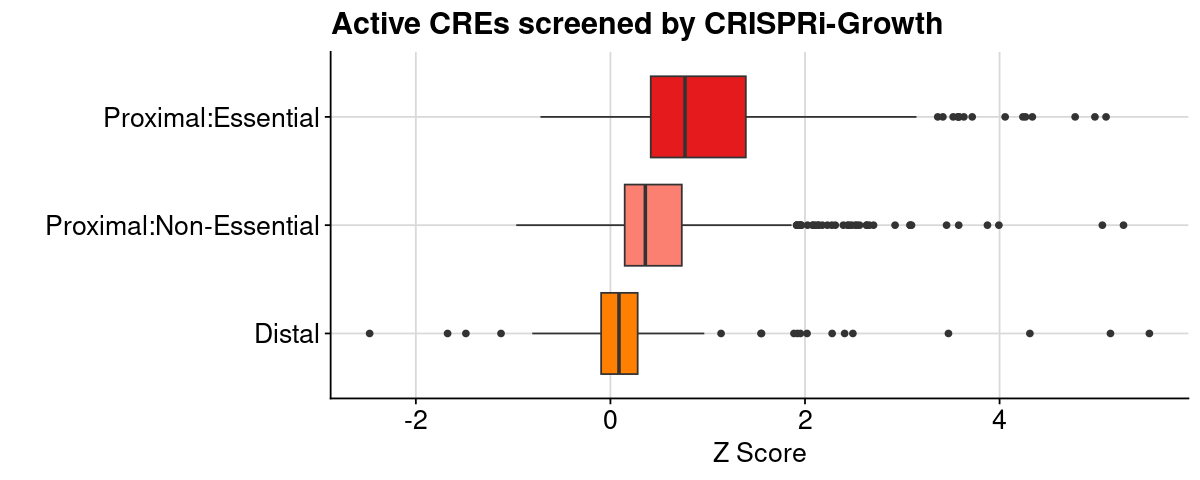

In [10]:
idx = "fcc_astarr_macs_input_union"
lst = lst_gpt_crispri_growth_tss_category
gpt = lst[[idx]]

options(repr.plot.height=4, repr.plot.width=10)
print(gpt)

**Export plot**

In [11]:
idx = "fcc_astarr_macs_input_union"
lst = lst_gpt_crispri_growth_tss_category
gpt = lst[[idx]]

plt_export = gpt
txt_export = "fig.fcc_comparison.tss_essential.crispri_growth.boxplot"
num_height = 4
num_width  = 10

txt_fdiry = "./"
txt_fname = paste(txt_export, "png", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")

txt_fdiry = "./"
txt_fname = paste(txt_export, "svg", sep = ".")
txt_fpath = file.path(txt_fdiry, txt_fname)
#ggsave(txt_fpath, plt_export, height = num_height, width = num_width, units = "in")